In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Done")

Done


In [2]:
from main_classes.voltage_maps import VoltageMapCollection
from main_classes.epsilon_cover import BasicCoverTree, run_cover_properties_test, estimate_span
from utilities.generate_toy_data import non_uniform_1d_experiment
print("DONE")

DONE


### Load data

In [3]:
data, _, _ = non_uniform_1d_experiment()
print(data.shape)

(12000, 1)


### Build epsilon covers

In [4]:
epsilon_reduce_factor = 2
init_radius = estimate_span(data)
epsilon_cover_factory = BasicCoverTree(init_radius)
for x in data:
    epsilon_cover_factory.insert(x)
print("DONE")

DONE


##### Estimate densities

In [5]:
centers_dict = epsilon_cover_factory.get_centers()
data_density_estimation, ref_epsilon_cover, ref_epsilon_cover_densities = non_uniform_1d_experiment()
epsilon_cover_factory.estimate_densities(data_density_estimation)
densities = epsilon_cover_factory.get_densities()
print("DONE")

DONE


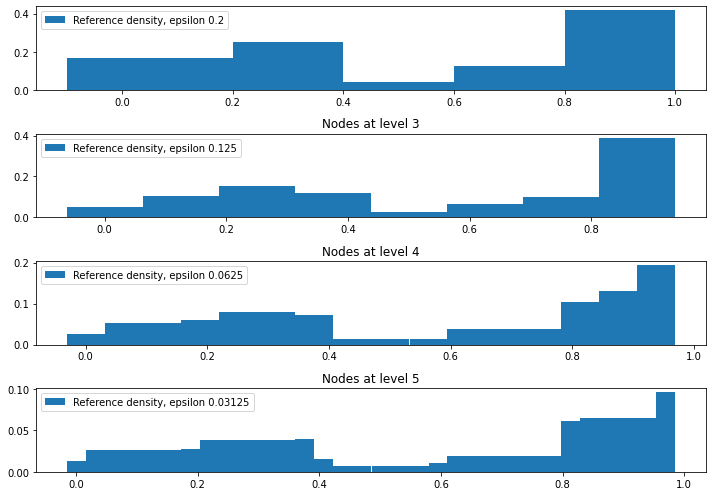

In [6]:
%matplotlib inline
epsilon = 0.2
lvlstart = 3
lvlstop = 6


max_lvl = min(5, len(centers_dict))
fig, axes = plt.subplots(lvlstop-lvlstart+1, 1, figsize=(10, 7))
axes[0].bar(x=ref_epsilon_cover.flatten(), height=ref_epsilon_cover_densities, width=epsilon, label=f'Reference density, epsilon {epsilon}', align='center')
axes[0].legend()
for i, lvl in enumerate(range(lvlstart, lvlstop)):
    centers = centers_dict[lvl]
    epsilon = init_radius / (epsilon_reduce_factor ** lvl)

    axes[i+1].set_title(f'Nodes at level {lvl}')
    axes[i+1].bar(x=np.array(centers).flatten(), height=densities[lvl], 
                   width=epsilon, label=f'Reference density, epsilon {epsilon}', align='center')
    axes[i+1].legend()
plt.tight_layout()
plt.show()

##### Get centers

Plot level 1
Number of centers lvl 1 = 3
Plot level 2
Number of centers lvl 2 = 4
Plot level 3
Number of centers lvl 3 = 8
Plot level 4
Number of centers lvl 4 = 16
Plot level 5
Number of centers lvl 5 = 32


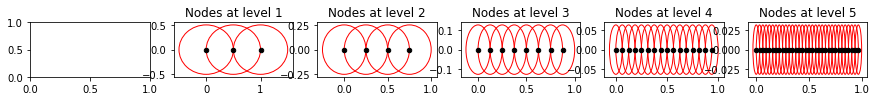

In [7]:
%matplotlib inline
centers = epsilon_cover_factory.get_centers()

max_lvl = min(5, len(centers_dict))
fig, axes = plt.subplots(1, max_lvl+1, figsize=(15, 1))
for lvl in range(1, max_lvl+1):
    centers = centers_dict[lvl]
    print(f'Plot level {lvl}')
    print(f'Number of centers lvl {lvl} = {len(centers)}')
    radius = init_radius / (epsilon_reduce_factor ** lvl)
    for center in centers:
        axes[lvl].set_title(f'Nodes at level {lvl}')
        axes[lvl].add_patch(plt.Circle(tuple([center, 0]),
                                    radius=radius, color='r', fill=False))
        axes[lvl].scatter(center, 0, s=20, c='k', marker='o', zorder=2)

plt.show()

## Construct voltage map collection and propagate voltages

In [44]:
max_lvl = 5
start_lvl = 3

voltage_map_collections = {}
source_indices = {}
epsilon_cover = epsilon_cover_factory.get_epsilon_cover(max_lvl = max_lvl+1)

# Source indices
source_indices[start_lvl] = np.arange(0, len(epsilon_cover[start_lvl]['centers']), 1)
source_indices[start_lvl+1] = np.arange(0, len(epsilon_cover[start_lvl+1]['centers']), 2)

In [53]:
epsilon_cover[start_lvl]['centers'][source_indices[start_lvl]]

array([[2.00000000e-04],
       [1.25200000e-01],
       [2.50200000e-01],
       [3.75266667e-01],
       [5.00800000e-01],
       [6.25866667e-01],
       [7.50533333e-01],
       [8.75535107e-01]])

In [54]:
epsilon_cover[start_lvl+1]['centers'][source_indices[start_lvl+1]]

array([[3.00000000e-04],
       [1.25300000e-01],
       [2.50266667e-01],
       [3.75333333e-01],
       [5.01200000e-01],
       [6.26000000e-01],
       [7.50666667e-01],
       [8.75575115e-01]])

### Default initialization

In [47]:
for lvl in range(start_lvl, max_lvl):
    voltage_map_collections[lvl] = VoltageMapCollection(epsilon_cover[lvl], source_indices[lvl])
voltage_map_collections[start_lvl].propagate_voltage_maps()
voltage_map_collections[start_lvl+1].propagate_voltage_maps()

propagating labels:   7%|████▌                                                               | 68/1000 [00:00<?, ?it/s]


##### First level

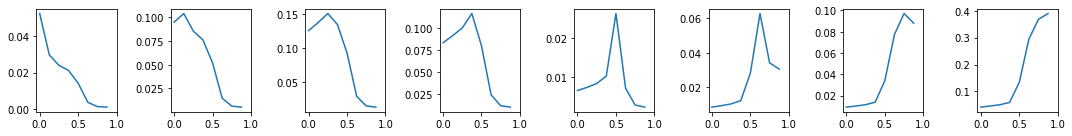

In [48]:
voltage_map_collection = voltage_map_collections[start_lvl].get_voltage_map_collection()
fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i, voltage_map in enumerate(voltage_map_collection):
    axes[i].plot(epsilon_cover[start_lvl]['centers'], voltage_map.get_voltage())
    axes[i].set_xticks([0, 0.5, 1])
plt.tight_layout()
plt.show()

##### Second level

voltage_map:  [0.02257939 0.02332195 0.02400776 0.0247692  0.02532421 0.02654869
 0.02867575 0.03784688 0.05204221 0.07113218 0.10026719 0.11247336
 0.11604648 0.11710402 0.13008333 0.11878512]


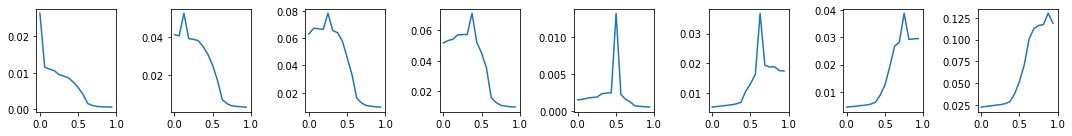

In [49]:
# Second level
voltage_map_collection = voltage_map_collections[start_lvl+1].get_voltage_map_collection()
fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i, voltage_map in enumerate(voltage_map_collection):
    axes[i].plot(epsilon_cover[start_lvl+1]['centers'], voltage_map.get_voltage())
    axes[i].set_xticks([0, 0.5, 1])
print("voltage_map: ", voltage_map.get_voltage())
plt.tight_layout()
plt.show()